<a href="https://colab.research.google.com/github/dakshayani2906/Data-Science-Portfolio/blob/main/German_Credit_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

German Credit Case Study

In [2]:
#import warnings

# warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

#Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

#Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

#To get different metric scores

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    precision_recall_curve,
    roc_curve
)

In [3]:
# Loading Dataset

data = pd.read_csv("German_Credit.csv")

In [4]:
# Overview Of the dataset

data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose
0,67,male,skilled,own,little,little,1169,6,0,radio/TV
1,22,female,skilled,own,little,moderate,5951,48,1,radio/TV
2,49,male,unskilled_and_non-resident,own,little,little,2096,12,0,education
3,45,male,skilled,free,little,little,7882,42,0,furniture/equipment
4,53,male,skilled,free,little,little,4870,24,1,car


In [5]:
data.tail()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose
995,31,female,unskilled_and_non-resident,own,little,little,1736,12,0,furniture/equipment
996,40,male,highly skilled,own,little,little,3857,30,0,car
997,38,male,skilled,own,little,little,804,12,0,radio/TV
998,23,male,skilled,free,little,little,1845,45,1,radio/TV
999,27,male,skilled,own,moderate,moderate,4576,45,0,car


This dataset contains infomration about the different applicants.

In [6]:
# Understand Shape of Dataset

data.shape

(1000, 10)

There are 1000 rows and 10 columns in the dataset

In [7]:
# Check the datatype of the column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Risk              1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


There are total 10 columns and 1000 observations in the dataset

We have only three continous variables - Age, Credit Amount, and Duration

All other variables are categorical.

We can see that there are no missing values in the dataset.

In [8]:
# Checking duplicates

data.duplicated().sum()

np.int64(0)

there are no duplicates in the dataset.

In [9]:
# checking missing values

data.isnull().sum()

,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,0
Checking account,0
Credit amount,0
Duration,0
Risk,0
Purpose,0


there are no missing values in the dataset.

In [10]:
# Statistical summary of the data

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Risk,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0


Mean value fot the age column is approx 35 and the median is 33. this shows that majority of the customers are under 35 years of age.

Mean amount of credit is approx 3271 but it has a wide range with values from 250 to 18424. We will explore this further in univariate analysis.

Mean duration for which the credit is given is approx 21 months.

In [12]:
# Making a list of all categorical variables

cat_col = [
    "Sex",
    "Job",
    "Housing",
    "Saving accounts",
    "Checking account",
    "Purpose",
    "Risk",
]

# Printing number of count of each unique value in each column

for column in cat_col:
  print(data[column].value_counts())
  print(" - " * 40)

Sex
male      690
female    310
Name: count, dtype: int64
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Job
skilled                       630
unskilled_and_non-resident    222
highly skilled                148
Name: count, dtype: int64
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Housing
own     713
rent    179
free    108
Name: count, dtype: int64
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Saving accounts
little        786
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Checking account
moderate    472
little      465
rich         63
Name: count, dtype: int64
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 

We have more male customers as compared to female customers

There are very few observations i.e only 22 for customers with job category - unskilled and non - resident.

We can see that the distribution of classes in the target variable variable is imbalanced i.e., only 30% observations with defaulters.

Most of the customers are not at risk.

In [19]:
# Univariate analysis

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

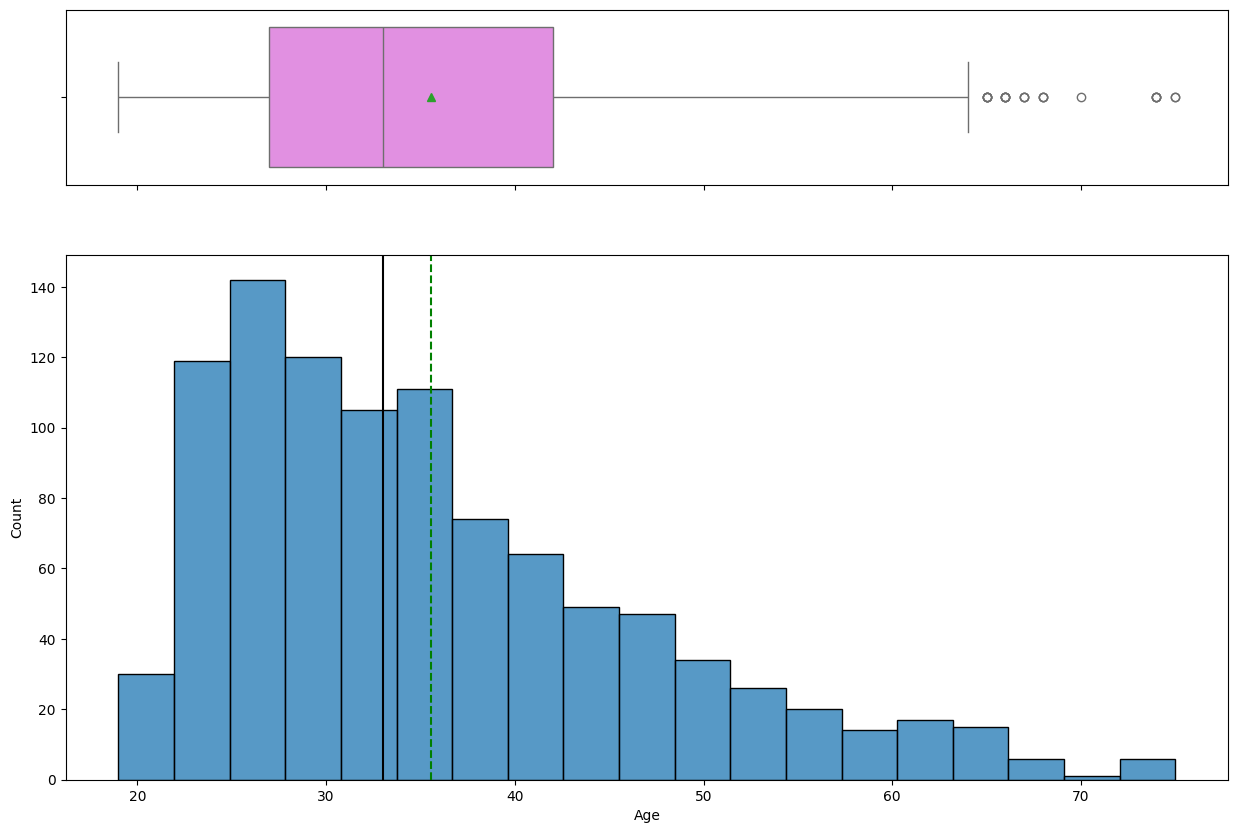

In [20]:
# Observation on Age

histogram_boxplot(data, "Age")

the distribution of age is right - skewed

the boxplot shows that there are outliners at the right end

We will not treat these outliners as they represent the real market trend.

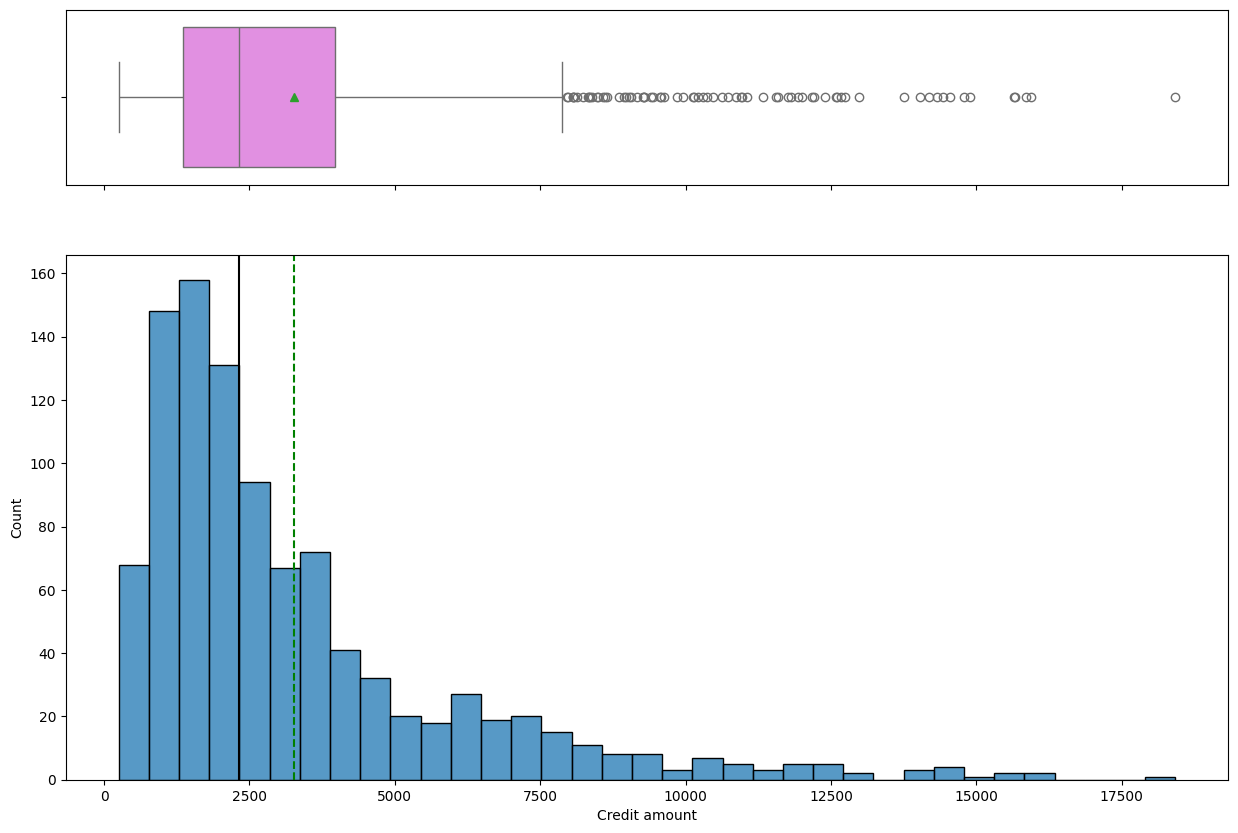

In [22]:
# Observations on Credit Amount

histogram_boxplot(data, "Credit amount")

The distribution of the credit amount is right - skewed

the boxplot shows that there are outliers at the right end

We will not treat these outliers as they represent the real market trend

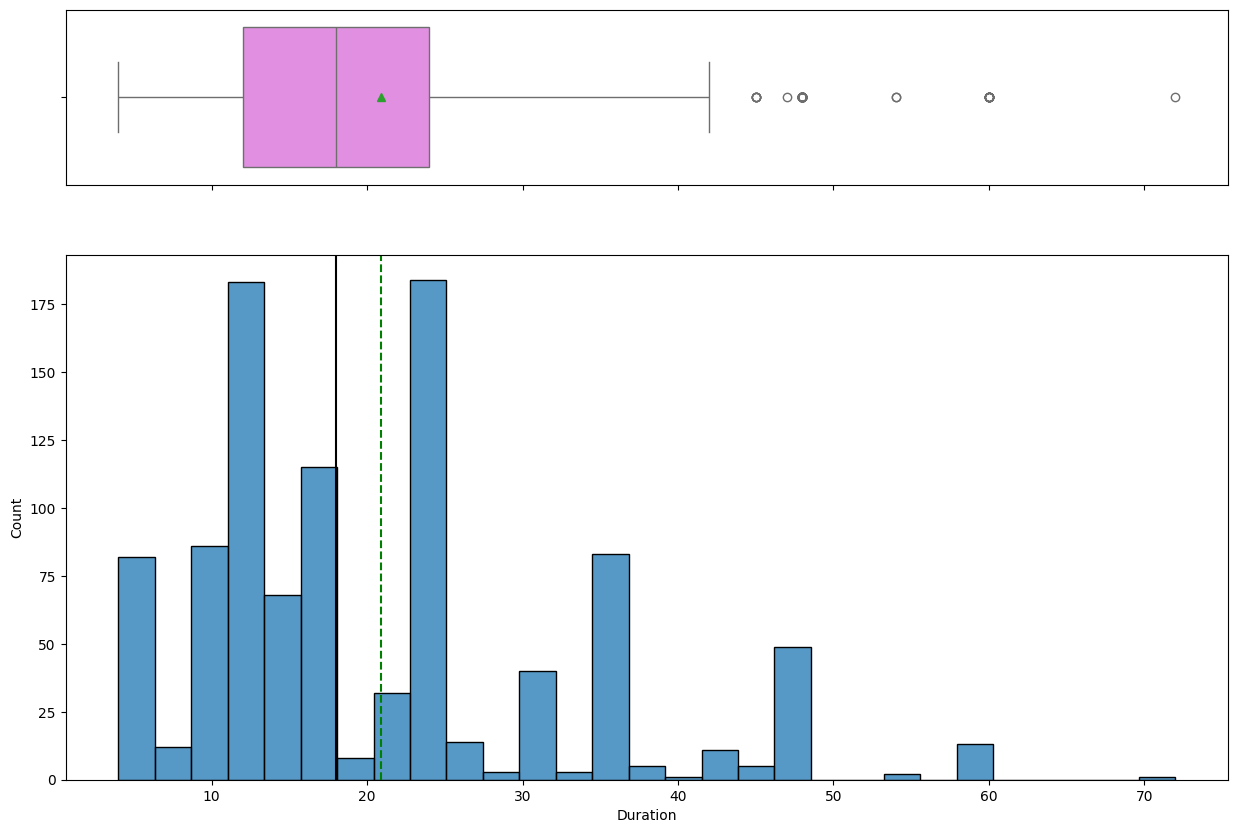

In [23]:
# Observations on Duration

histogram_boxplot(data, "Duration")

the distribution of the duration for which the credit is right-skewed

the boxplot shows that there are outliers at the right end

We will not treat these outliers as they represent the real market trend

In [26]:
# function to create labelled barplots

def labeled_barplot(data, feature, perc = False, n = None):

  '''
  Barplot with percentage at the top

  data: dataframe
  feature: dataframe column
  perc: whether to display percentages instead of count (default is False)
  n: displays the top n category levels (default is None, i.e, display all levels)

  '''

  total = len(data[feature]) # Length of the column
  count = data[feature].nunique()
  if n is None:
    plt.figure(figsize = (n + 2, 6))
  else:
    plt.figure(figsize = (n+2, 6))

  plt.xtricks(rotation = 90, fontsize = 15)
  ax = sns.countplot(
      data = data,
      x=feature,
      palette = 'Paired',
      order =data[feature].value_counts().index[:n],
  )

  for p in ax.patches:
    if perc == True:
      label ="{: .1f}%".format(
          100 * p.get_height() / total
      ) # Percentage of each class of the category
    else:
      label = p.get_height() # height of the plot

    x = p.get_x() + p.get_width() / 2 # width of the plot
    y = p.get_height() # Height of the plot

    ax.annotate(
        label,
        (x,y),
        ha = 'center',
        va = 'center',
        size = 12,
        xytext = (0,5),
        textcoords = 'offset points',
    ) # annotate the percentage

plt.show() # show the plot

In [28]:
# Observations on Risk

labeled_barplot(data, "Risk", perc=True)

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'